In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from umap import UMAP
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
from tqdm import tqdm

In [2]:
train_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_fov/train_latents.h5")
val_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_fov/val_latents.h5")
test_latents = pd.read_hdf("../../../data/experiments/image_embeddings/specific_targets/resnet_fov/test_latents.h5")

train_latents["type"] = "train"
val_latents["type"] = "val"
test_latents["type"]= "test"

latents = train_latents.append(val_latents).append(test_latents)

In [3]:
label_dict= {'AKT1': 0, 'AKT1S1': 1, 'ATF4': 2, 'ATG16L1': 3, 'ATG5': 4, 'BAMBI': 5, 'BAX': 6, 'BCL2L11': 7, 'BECN1': 8, 'BRAF': 9, 'CASP8': 10, 'CDC42': 11, 'CDK2': 12, 'CDKN1A': 13, 'CEBPA': 14, 'CREB1': 15, 'CSNK1E': 16, 'CXXC4': 17, 'DUSP1': 18, 'ELK1': 19, 'ERG': 20, 'GLI1': 21, 'HRAS': 22, 'IKBKB': 23, 'JAK2': 24, 'JUN': 25, 'KRAS': 26, 'MAP2K4': 27, 'MAP3K2': 28, 'MAP3K8': 29, 'MAP3K9': 30, 'MLST8': 31, 'PDPK1': 32, 'PRKACA': 33, 'RAF1': 34, 'RELB': 35, 'RHOA': 36, 'SMAD3': 37, 'SMAD4': 38, 'SMO': 39, 'SRC': 40, 'SREBF1': 41, 'TCF4': 42, 'TSC2': 43}
label_dict=dict(zip(list(label_dict.values()), list(label_dict.keys())))

In [4]:
def plot_embs(latents, label_dict):
    marker_dict = {"train":"o", "val":"s", "test":"X"}
    color_dict = {"train":"tab:blue", "val":"tab:green", "test":"tab:red"}
    tmp = latents.copy()
    latents = tmp.loc[:, ~latents.columns.isin(["labels", "type"])]
    zs = StandardScaler().fit_transform(latents)
    labels = tmp.loc[:, "labels"].map(label_dict)
    types = tmp.loc[:, "type"]
    
    embs = UMAP().fit_transform(zs)
    
    for target in tqdm(np.unique(labels)):
        fig, ax = plt.subplots(figsize=[12,8])
        for t in ["train", "val", "test"]:
            e = embs[types == t, :]
            l = labels[types==t]
            ax.scatter(e[l==target,0],e[l==target, 1], c=color_dict[t], alpha=0.5, label="{}_{}".format(t.upper(), target.upper()), marker=marker_dict[t], s=5)
            ax.scatter(e[l!=target, 0], e[l!=target, 1], c="tab:gray", alpha=0.01, label="{}_REST".format(t.upper()), marker=marker_dict[t], s=5)
        ax.set_xlabel("umap_0")
        ax.set_ylabel("umap_1")
        ax.set_title("Embeddings for {} vs REST".format(target.upper()))
        plt.legend()
        plt.show()
        plt.close()

  0%|          | 0/44 [00:00<?, ?it/s]

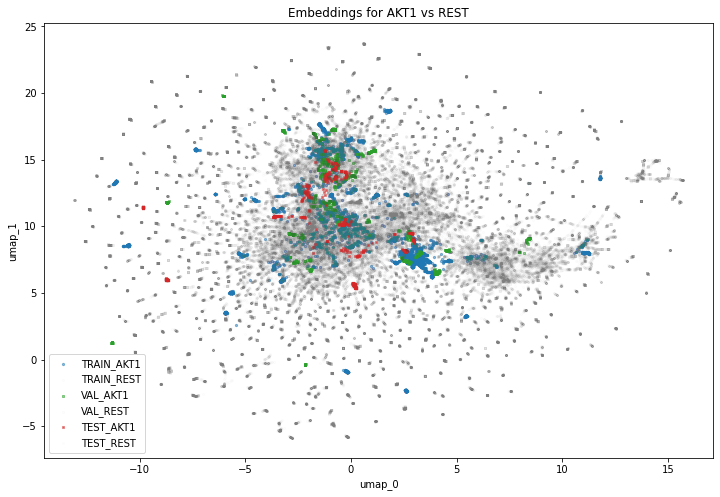

  2%|▏         | 1/44 [00:01<00:51,  1.19s/it]

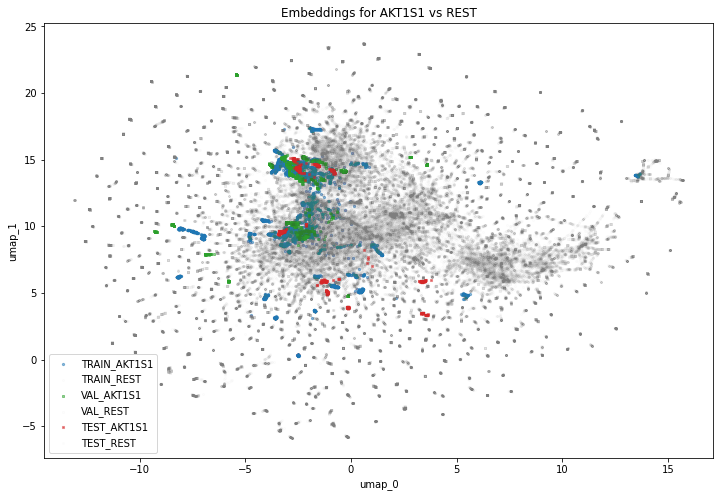

  5%|▍         | 2/44 [00:02<00:49,  1.18s/it]

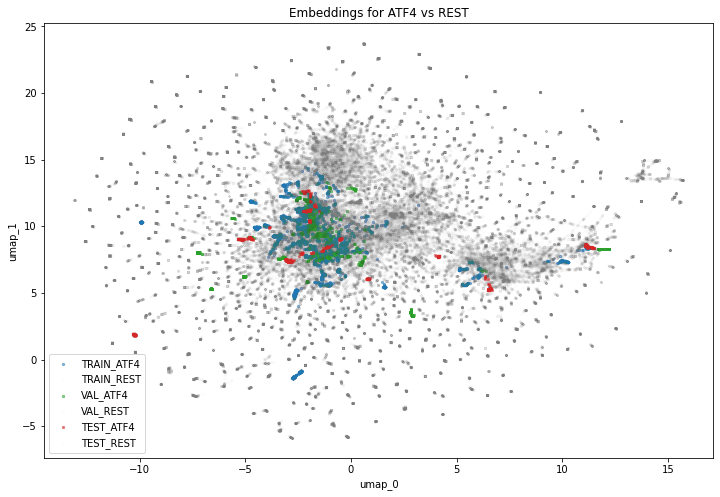

  7%|▋         | 3/44 [00:03<00:47,  1.17s/it]

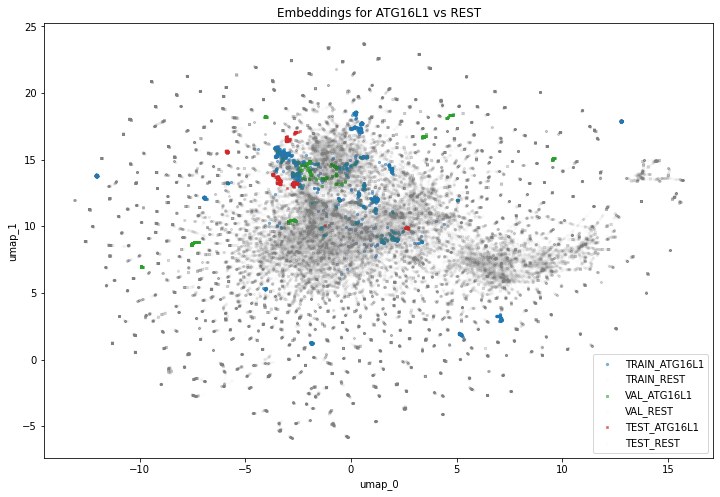

  9%|▉         | 4/44 [00:04<00:50,  1.26s/it]

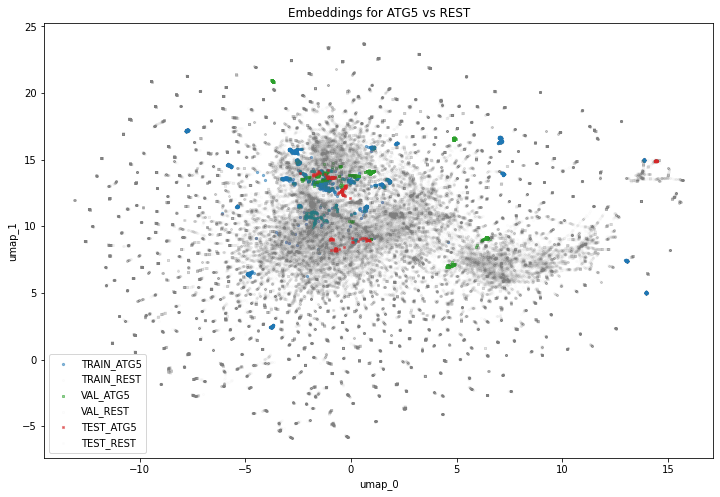

 11%|█▏        | 5/44 [00:06<00:47,  1.22s/it]

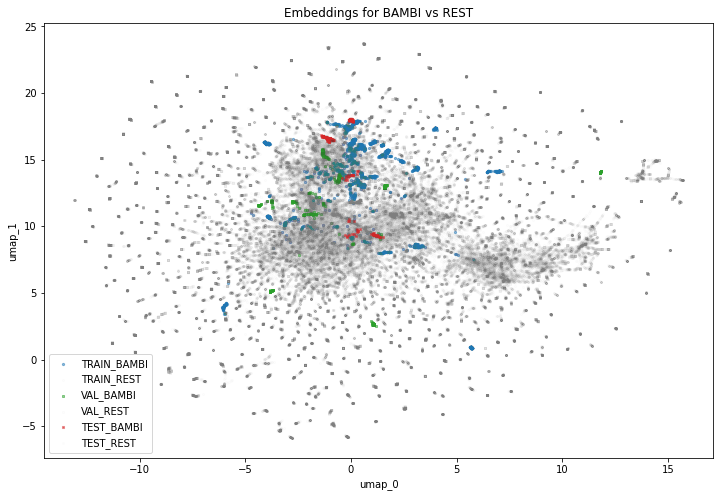

 14%|█▎        | 6/44 [00:07<00:45,  1.20s/it]

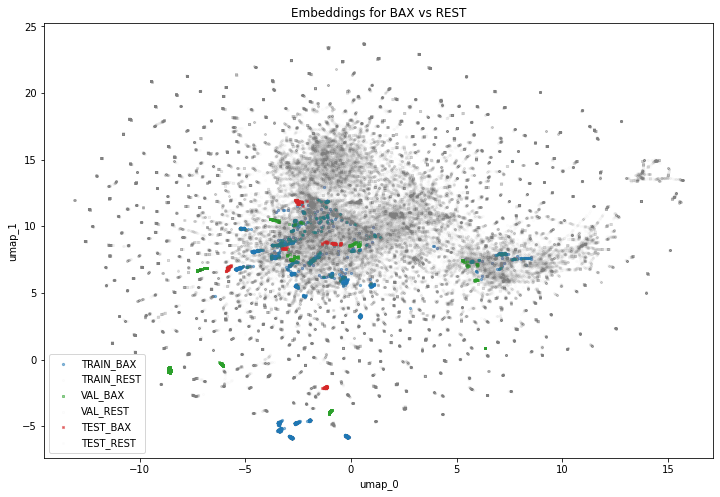

 16%|█▌        | 7/44 [00:08<00:43,  1.19s/it]

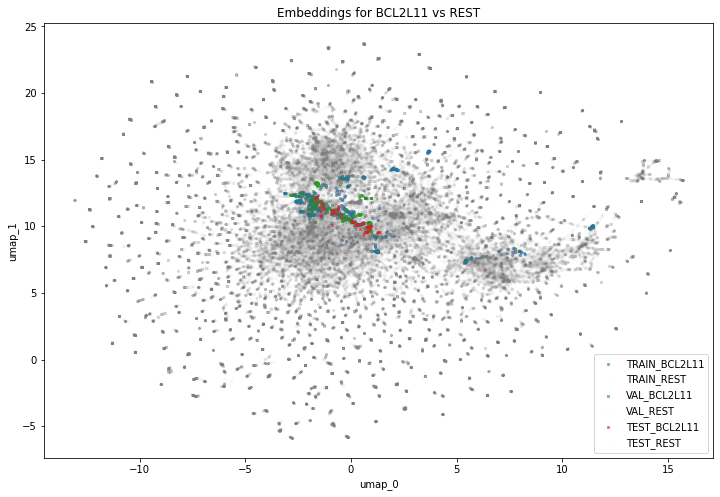

 18%|█▊        | 8/44 [00:09<00:45,  1.25s/it]

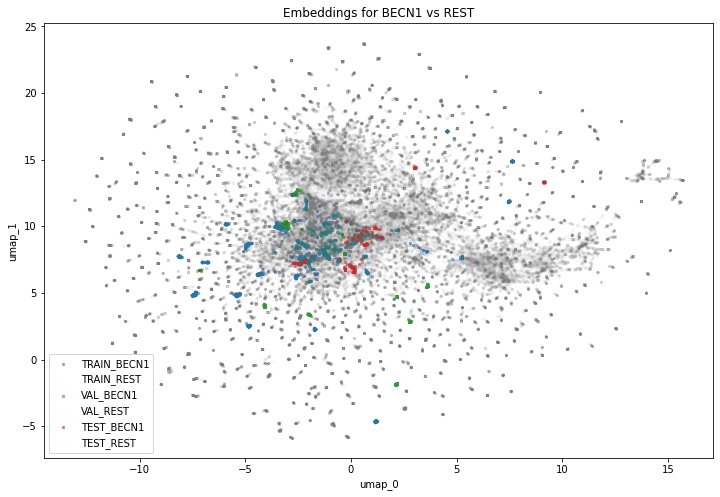

 20%|██        | 9/44 [00:11<00:44,  1.28s/it]

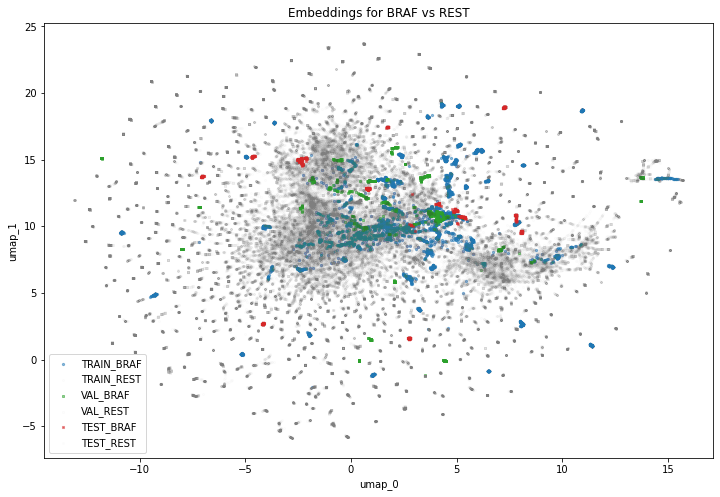

 23%|██▎       | 10/44 [00:12<00:42,  1.26s/it]

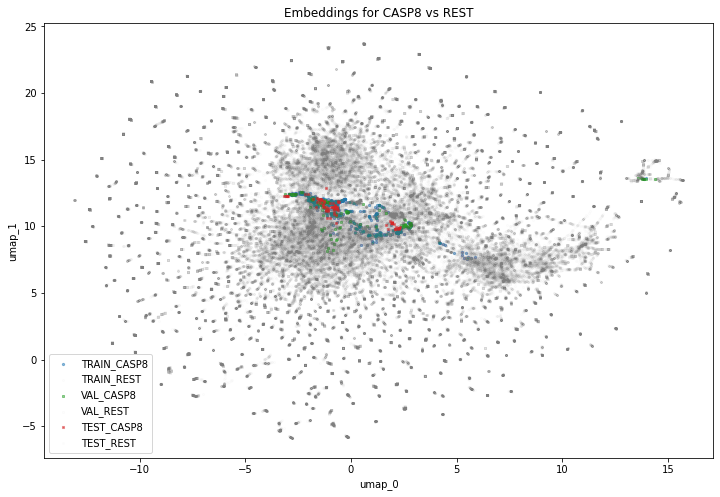

 25%|██▌       | 11/44 [00:13<00:41,  1.26s/it]

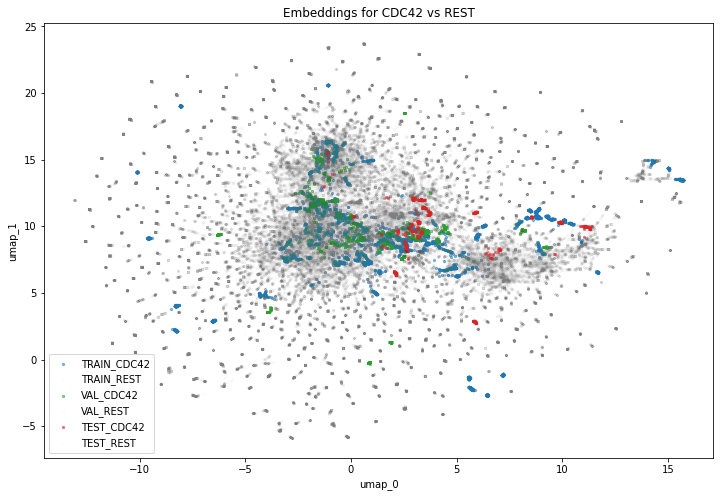

 27%|██▋       | 12/44 [00:14<00:40,  1.25s/it]

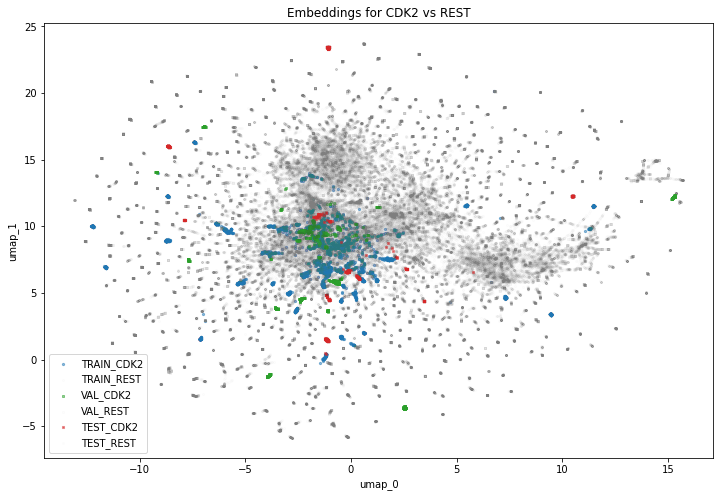

 30%|██▉       | 13/44 [00:16<00:38,  1.26s/it]

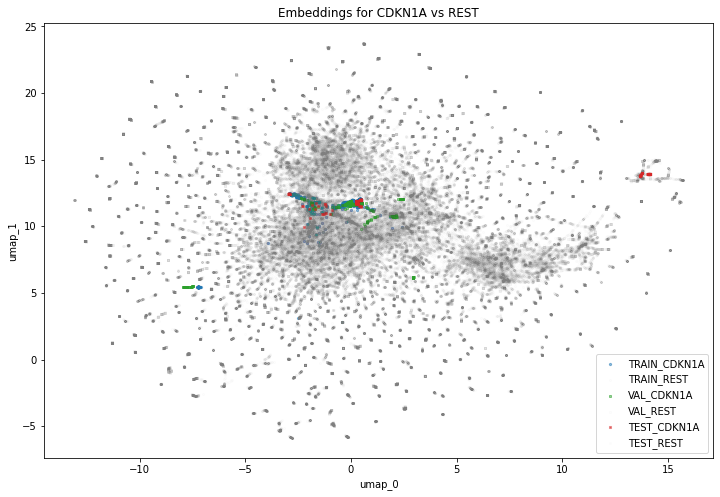

 32%|███▏      | 14/44 [00:17<00:39,  1.31s/it]

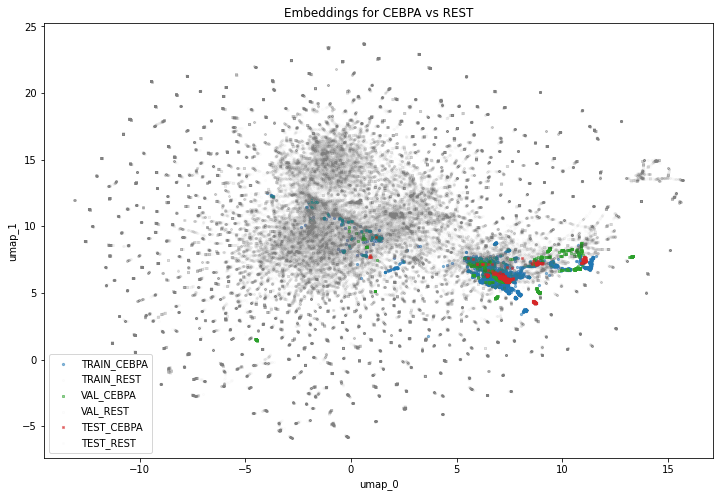

 34%|███▍      | 15/44 [00:18<00:36,  1.28s/it]

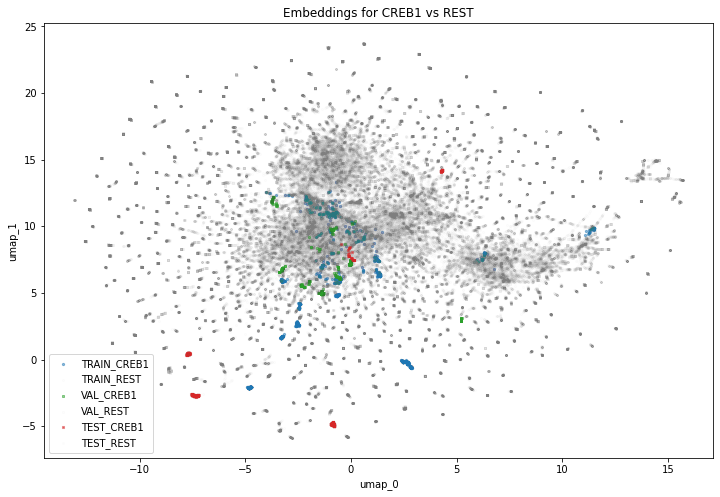

 36%|███▋      | 16/44 [00:19<00:35,  1.25s/it]

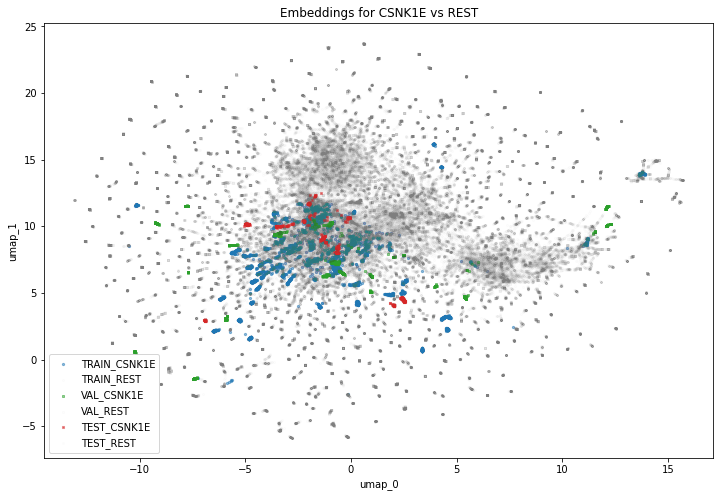

 39%|███▊      | 17/44 [00:21<00:33,  1.23s/it]

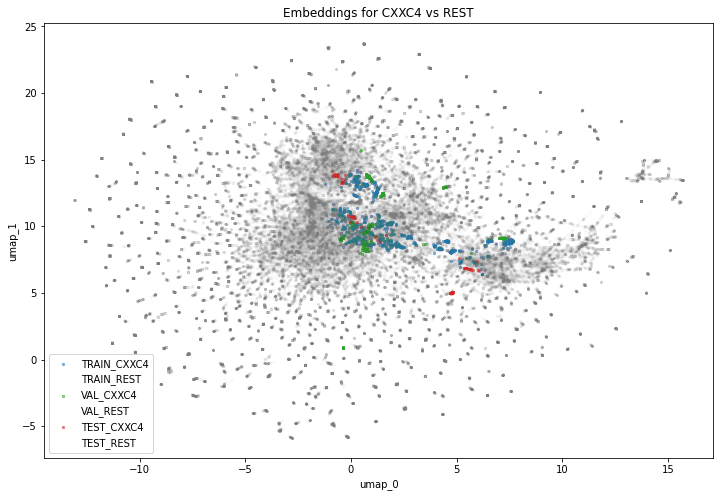

 41%|████      | 18/44 [00:22<00:32,  1.23s/it]

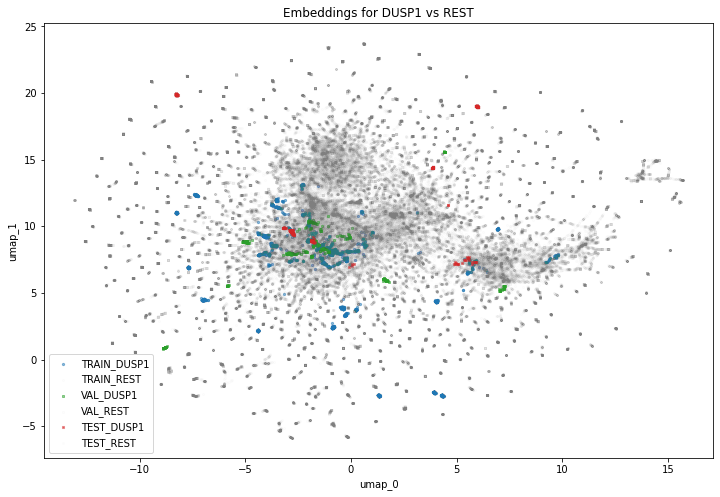

 43%|████▎     | 19/44 [00:23<00:30,  1.24s/it]

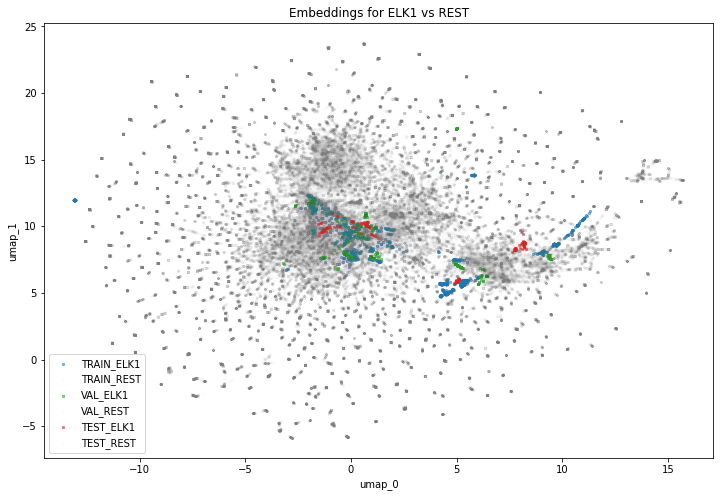

 45%|████▌     | 20/44 [00:24<00:29,  1.22s/it]

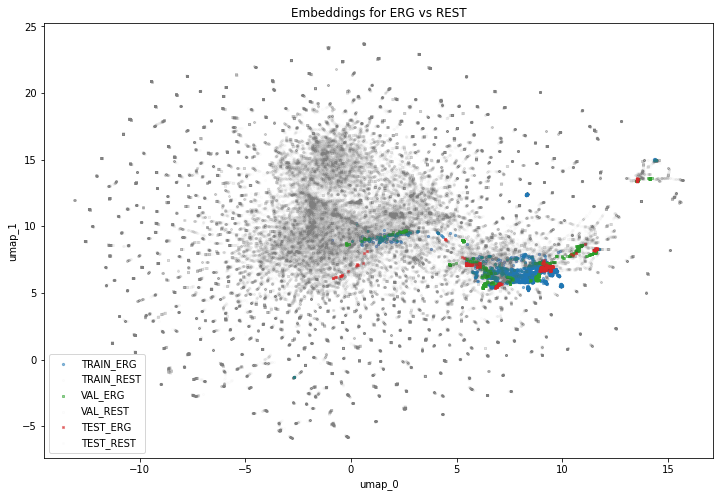

 48%|████▊     | 21/44 [00:25<00:27,  1.21s/it]

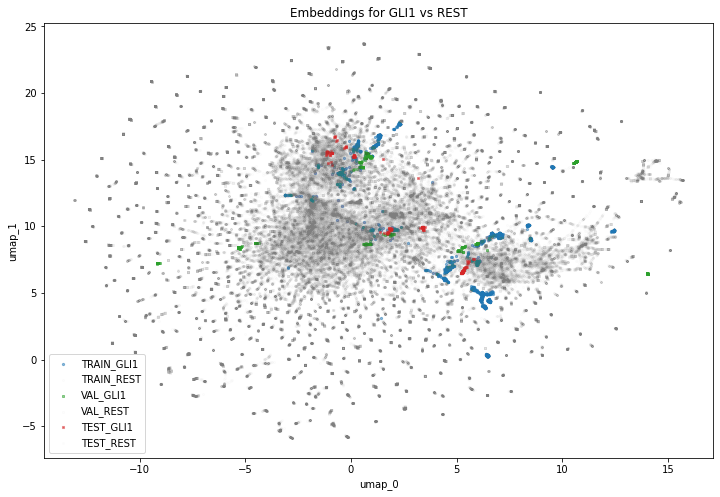

 50%|█████     | 22/44 [00:27<00:26,  1.20s/it]

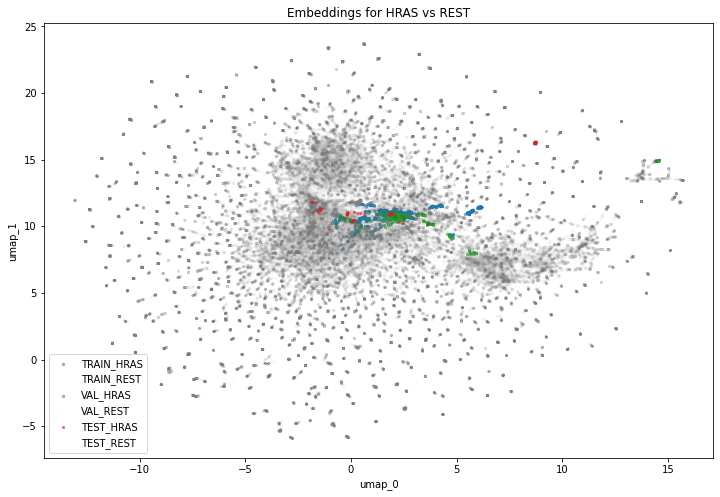

 52%|█████▏    | 23/44 [00:28<00:24,  1.19s/it]

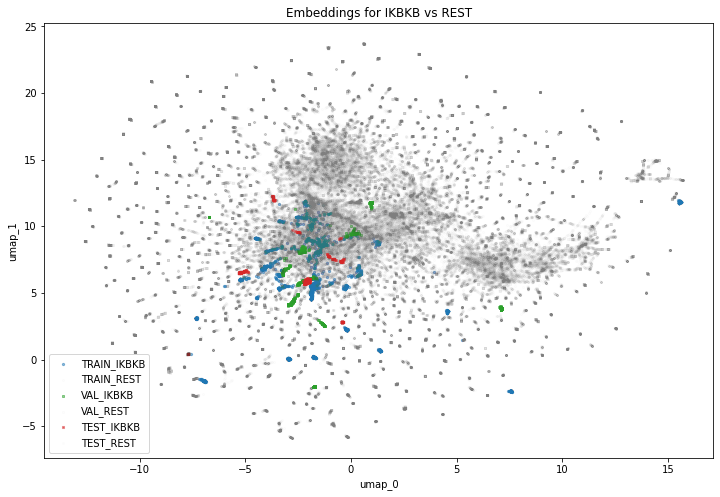

 55%|█████▍    | 24/44 [00:29<00:23,  1.18s/it]

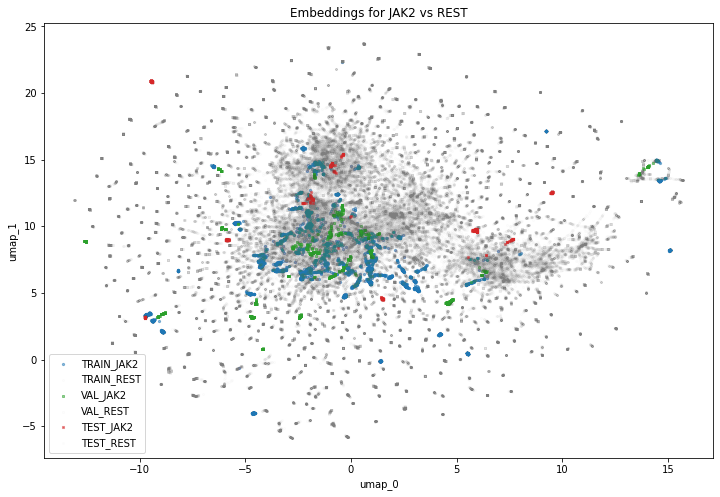

 57%|█████▋    | 25/44 [00:30<00:22,  1.19s/it]

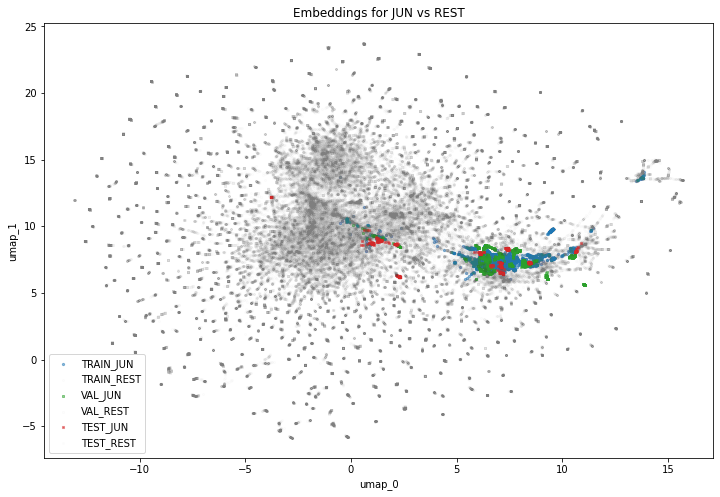

 59%|█████▉    | 26/44 [00:31<00:21,  1.18s/it]

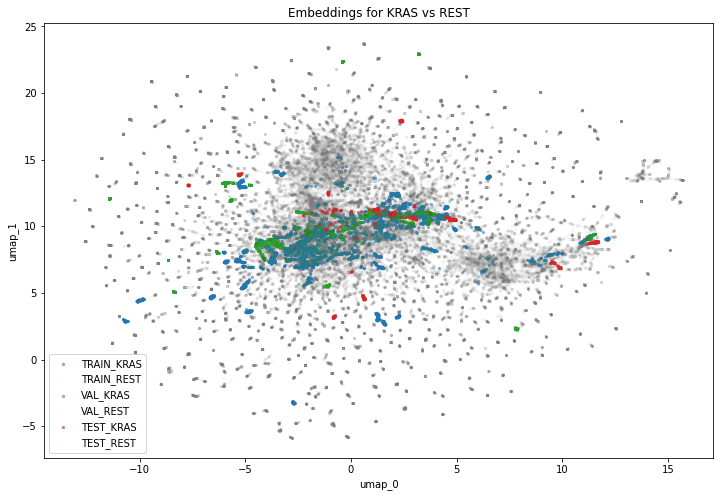

 61%|██████▏   | 27/44 [00:33<00:20,  1.19s/it]

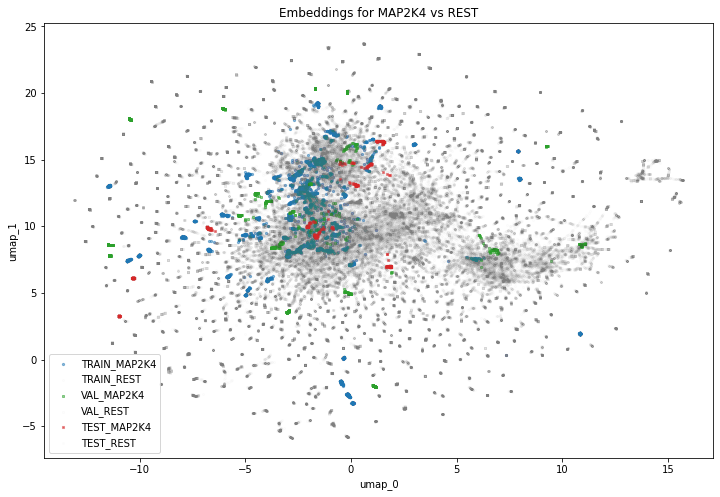

 64%|██████▎   | 28/44 [00:34<00:19,  1.19s/it]

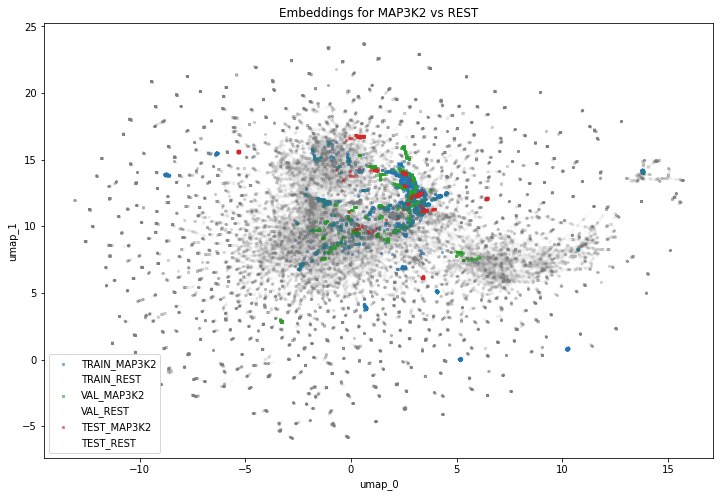

 66%|██████▌   | 29/44 [00:35<00:17,  1.18s/it]

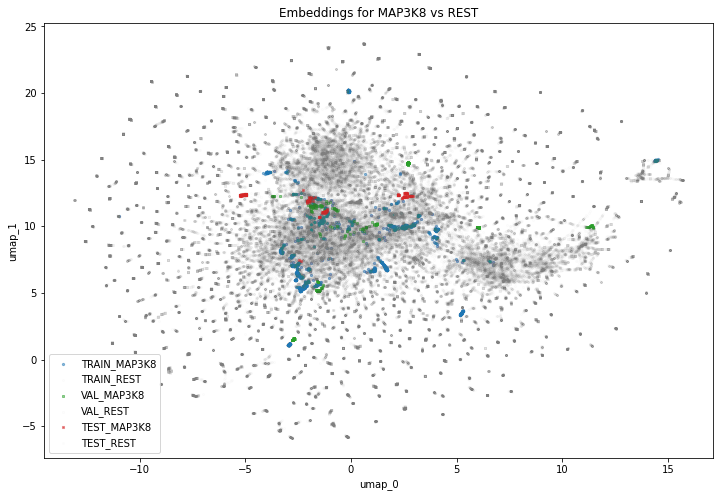

 68%|██████▊   | 30/44 [00:36<00:16,  1.18s/it]

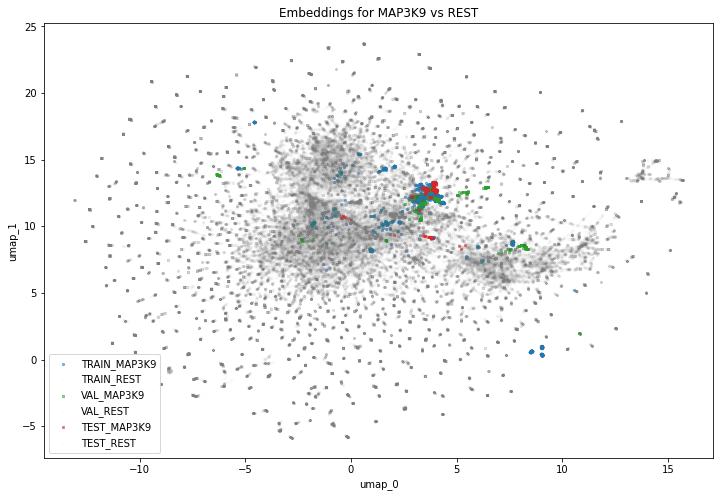

 70%|███████   | 31/44 [00:37<00:15,  1.23s/it]

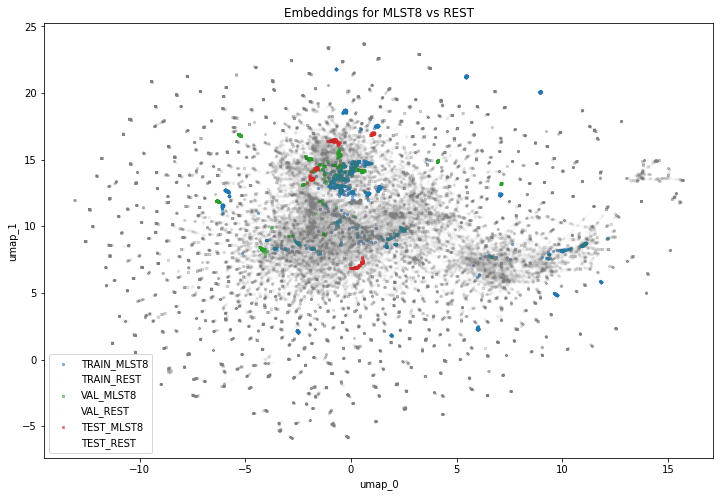

 73%|███████▎  | 32/44 [00:39<00:14,  1.23s/it]

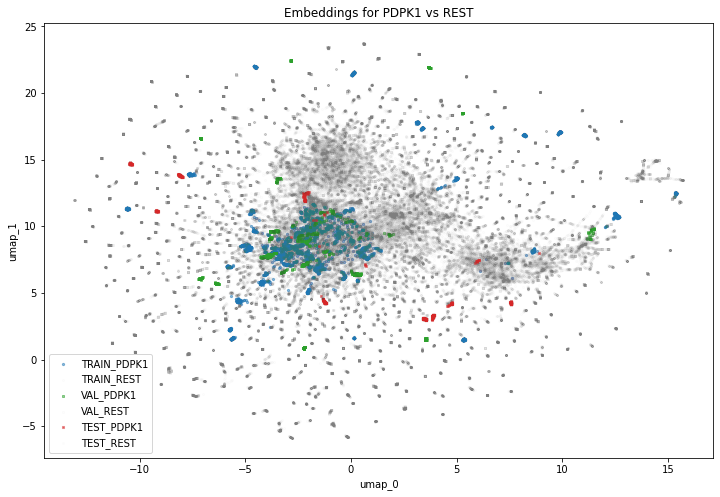

 75%|███████▌  | 33/44 [00:40<00:13,  1.22s/it]

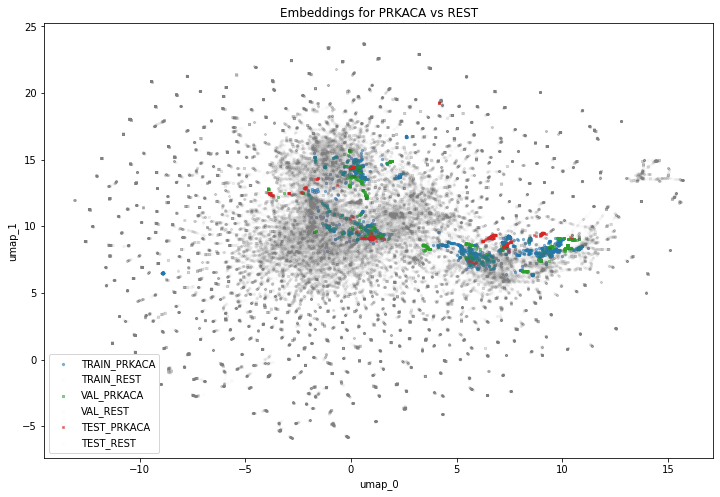

 77%|███████▋  | 34/44 [00:41<00:12,  1.21s/it]

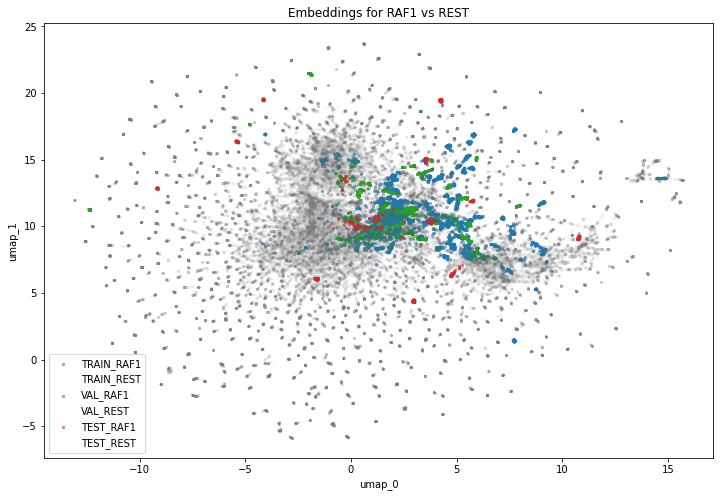

 80%|███████▉  | 35/44 [00:42<00:10,  1.20s/it]

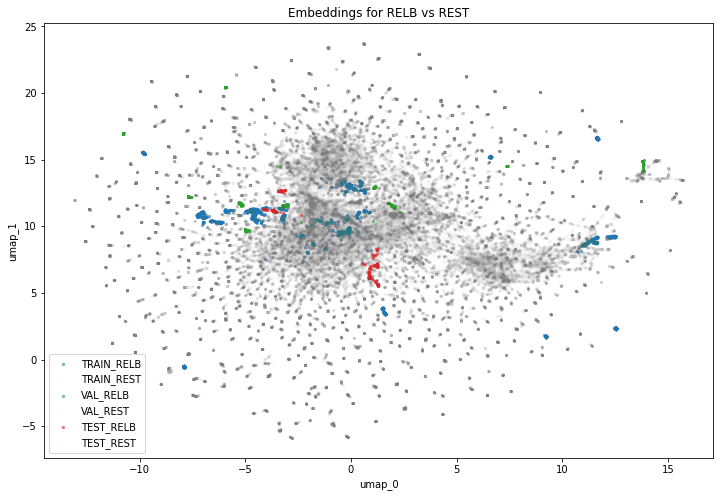

 82%|████████▏ | 36/44 [00:43<00:09,  1.20s/it]

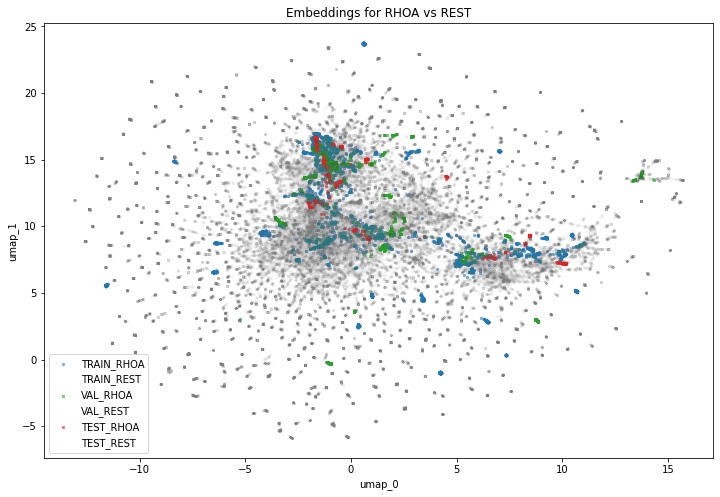

 84%|████████▍ | 37/44 [00:45<00:08,  1.20s/it]

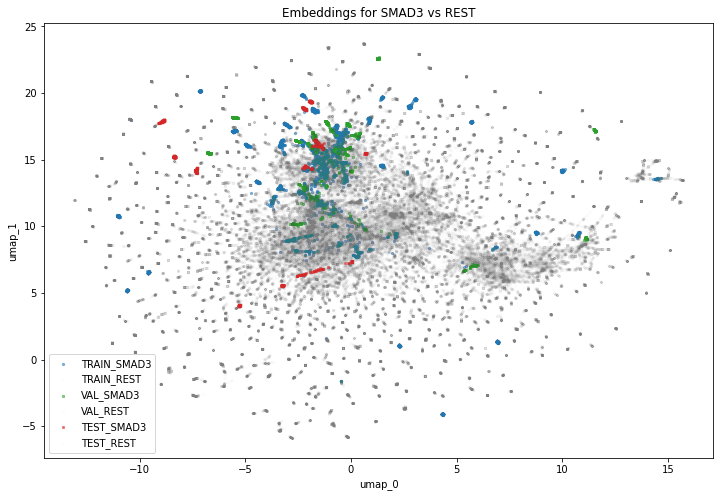

 86%|████████▋ | 38/44 [00:46<00:07,  1.19s/it]

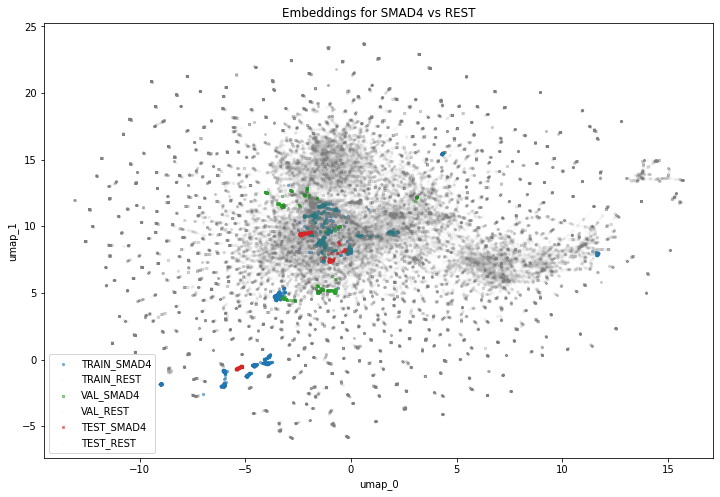

 89%|████████▊ | 39/44 [00:47<00:05,  1.19s/it]

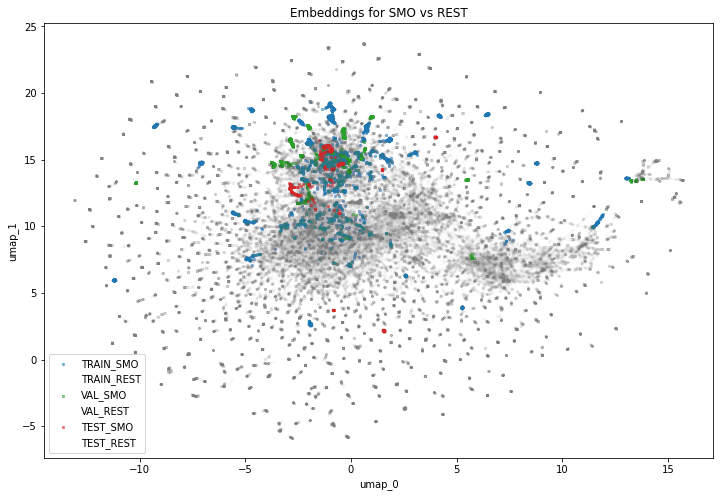

 91%|█████████ | 40/44 [00:48<00:04,  1.18s/it]

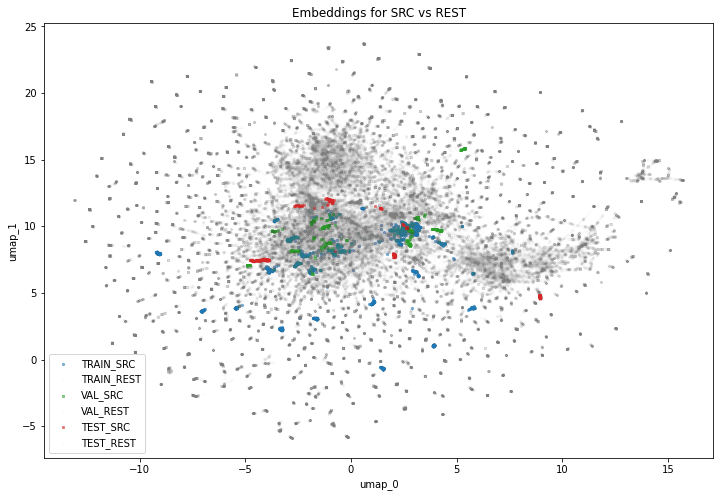

 93%|█████████▎| 41/44 [00:49<00:03,  1.18s/it]

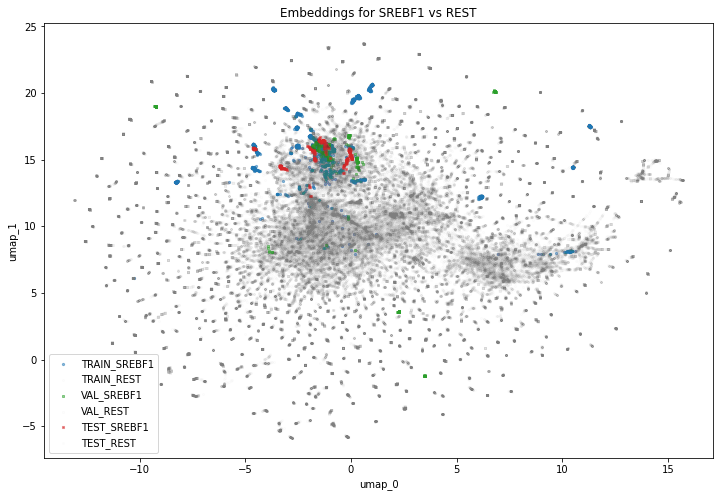

 95%|█████████▌| 42/44 [00:51<00:02,  1.18s/it]

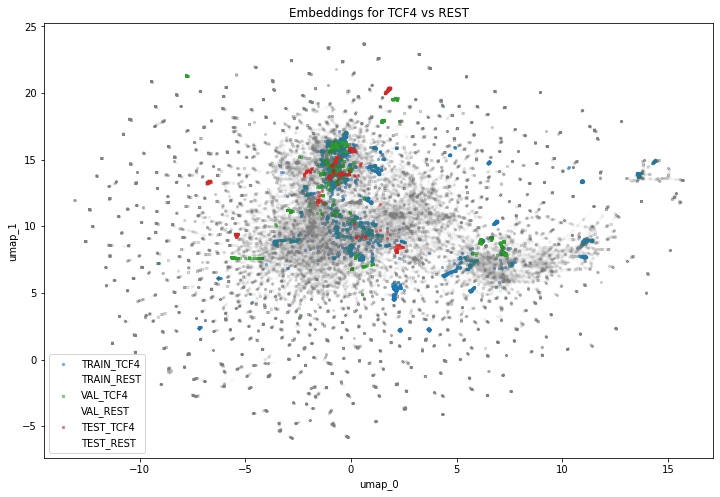

 98%|█████████▊| 43/44 [00:52<00:01,  1.19s/it]

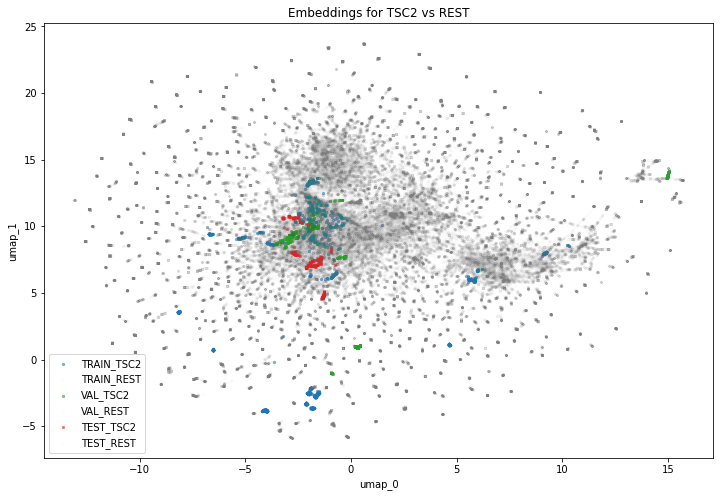

100%|██████████| 44/44 [00:53<00:00,  1.21s/it]


In [5]:
plot_embs(latents, label_dict=label_dict)